In [1]:
# Importing basic libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset in python
data= pd.read_excel('C:/Users/Stevelal/Downloads/iris.xls')
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# Checking the variables
data['Classification'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [4]:
# CHecking for null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [5]:
# Checking the statistical describtion of the data
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Handling the NaN in SL, SW, PL using median
data['SL']=data['SL'].fillna(data['SL'].mean())
data['SW']=data['SW'].fillna(data['SW'].mean())
data['PL']=data['PL'].fillna(data['PL'].mean())

In [7]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [8]:
data.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.808480,0.421884,1.725479,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.200000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Encoding the non-integer varaibles for further analysis
from sklearn.preprocessing import LabelEncoder
label_en= LabelEncoder()
a=['Classification']
for i in np.arange(len(a)):
    data[a[i]]= label_en.fit_transform(data[a[i]])

In [10]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


In [11]:
data['Classification'].value_counts()

0    50
1    50
2    50
Name: Classification, dtype: int64

<AxesSubplot:>

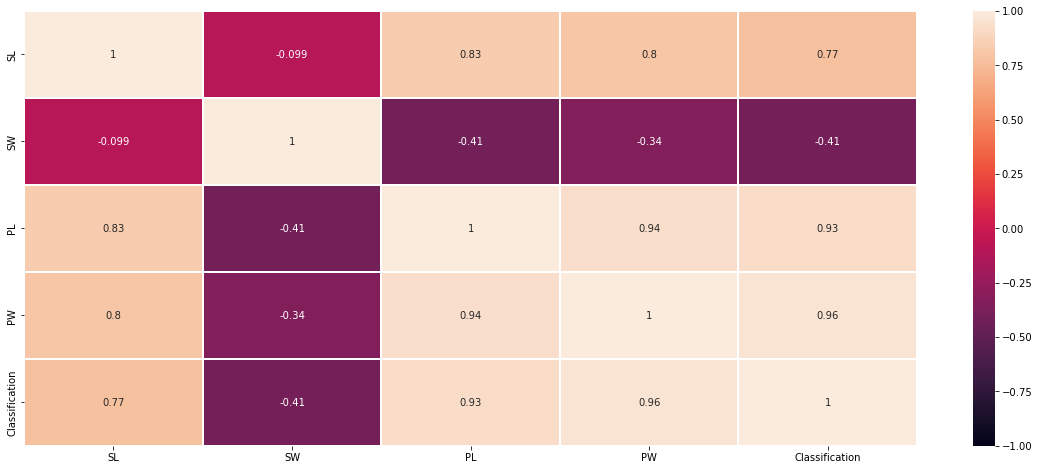

In [12]:
# Checking the correlation of the variables
corrmatrix= data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix, vmin=-1, vmax=1, annot= True, linewidth= 0.2)

In [13]:
# Classifying the x and y variables
x= data.drop(['Classification'],axis=1)
y=data['Classification']

In [14]:
# Importing the necessary libraries for model creation
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=42, test_size= 0.2)

In [15]:
# Defining the models
Logit_model= LogisticRegression()
Knn_model= KNeighborsClassifier()
svm_model = SVC(kernel = 'rbf', random_state = 0)
rf_model= RandomForestClassifier()

In [16]:
# Fitting the KNN model
Knn_model.fit(x_train,y_train)
y_pred= Knn_model.predict(x_test)
print('Accuracy Score of KNN model is:', accuracy_score(y_test, y_pred))

Accuracy Score of KNN model is: 0.9666666666666667


C:\Users\Stevelal\AppData\Local\Temp\ipykernel_5000\1458760249.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  a=pd.Series()
C:\Users\Stevelal\AppData\Local\Temp\ipykernel_5000\1458760249.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score(prediction,y_test)))
C:\Users\Stevelal\AppData\Local\Temp\ipykernel_5000\1458760249.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accuracy_score(prediction,y_test)))
C:\Users\Stevelal\AppData\Local\Temp\ipykernel_5000\1458760249.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  a=a.append(pd.Series(accu

([<matplotlib.axis.XTick at 0x1c64a3d6ac0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

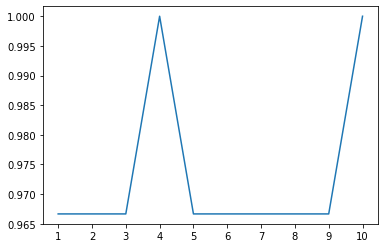

In [17]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(x_train,y_train)
    prediction=model.predict(x_test)
    a=a.append(pd.Series(accuracy_score(prediction,y_test)))
plt.plot(a_index, a)
plt.xticks(x)

In [18]:
Knn_model= KNeighborsClassifier(n_neighbors=4)
Knn_model.fit(x_train,y_train)
y_pred= Knn_model.predict(x_test)
print('Accuracy Score of KNN model is:', accuracy_score(y_test, y_pred))

Accuracy Score of KNN model is: 1.0


In [19]:
# Fitting the logistic model
Logit_model.fit(x_train,y_train)
y_pred= Logit_model.predict(x_test)
print('Accuracy Score of Logistic model is:', accuracy_score(y_test, y_pred))


Accuracy Score of Logistic model is: 1.0


In [20]:
# Fitting the Random Tree classifier
rf_model.fit(x_train,y_train)
y_pred= rf_model.predict(x_test)
print('Accuracy Score of Random Forest model is:', accuracy_score(y_test, y_pred))

Accuracy Score of Random Forest model is: 1.0


In [21]:
# Fitting the svm model
svm_model.fit(x_train,y_train)
y_pred= svm_model.predict(x_test)
print('Accuracy Score of SVM model is:', accuracy_score(y_test, y_pred))

Accuracy Score of SVM model is: 1.0


All the models, that is, logistic, svm, KNN model and Random Forest Classifiers are showing an accuracy rate of 100 percent. Hence any model can be used to predict the species of the plant based the iris dataset. 